# 引入库

In [12]:
import sys
#sys.path
from adabound import *
from adamod import *
from adasmooth import *

import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as image
import cv2
import os

# 准确率曲线绘制

In [28]:
import numpy as np
LABELS = ['SGD', 'RMSprop','AdaGrad', 'Adam', 'AMSGrad', 'AdaBound','AdaMod', 'AdaSmooth']

In [29]:
def get_folder_path():
    path = 'curve_acc'    
    return path

In [30]:
folder_path = get_folder_path()
filenames = [name for name in os.listdir(folder_path)]

In [32]:
 paths = [os.path.join(folder_path, name) for name in filenames]

In [34]:
keys = [name.split('_')[0] for name in filenames]

In [37]:
def get_curve_data():
    folder_path = get_folder_path()
    filenames = [name for name in os.listdir(folder_path) ]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('_')[0] for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [41]:
def plot(file_name,optimizers=None, curve_type='train'):    
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)    
    assert all(_ in LABELS for _ in optimizers), 'Invalid optimizer'
    
    curve_data = get_curve_data()
    
    plt.figure(dpi=300,figsize=(5,4))
    #plt.figure()
    plt.title('{} Accuracy on MNIST'.format(curve_type.capitalize()))
    plt.xlabel('Epoch')
    plt.ylabel('{} Accuracy %'.format(curve_type.capitalize()))
    #plt.ylim(80, 100 if curve_type == 'train' else 96)
    #plt.ylim(95, 100 if curve_type == 'train' else 96)
    plt.ylim(95 if curve_type == 'train' else 98, 100)
    # plt.ylim(0.85,1.0)    
    
    for optim in optimizers:
        linestyle = '--' if 'Smooth' in optim else '-'
        #color = "red" if 'Smooth' in optim else None
        accuracies = np.array(curve_data[optim]['{}_acc'.format(curve_type)])*100        
        print(optim,accuracies.max())
        #plt.plot(accuracies, label=optim, ls=linestyle,color=color)
        plt.plot(accuracies, label=optim, ls=linestyle)
        
    plt.grid(ls='--')    
    plt.legend(loc="lower right")   
    plt.savefig(file_name,format="svg")    
    # 应该在plt.savefig之后再调用plt.show()，否则保存的图片是空白
    plt.show()  

SGD 95.99833488464355
RMSprop 99.52499866485596
AdaGrad 97.17000126838684
Adam 99.51000213623047
AMSGrad 99.46333169937134
AdaBound 99.15000200271606
AdaMod 99.50666427612305
AdaSmooth 99.22166466712952


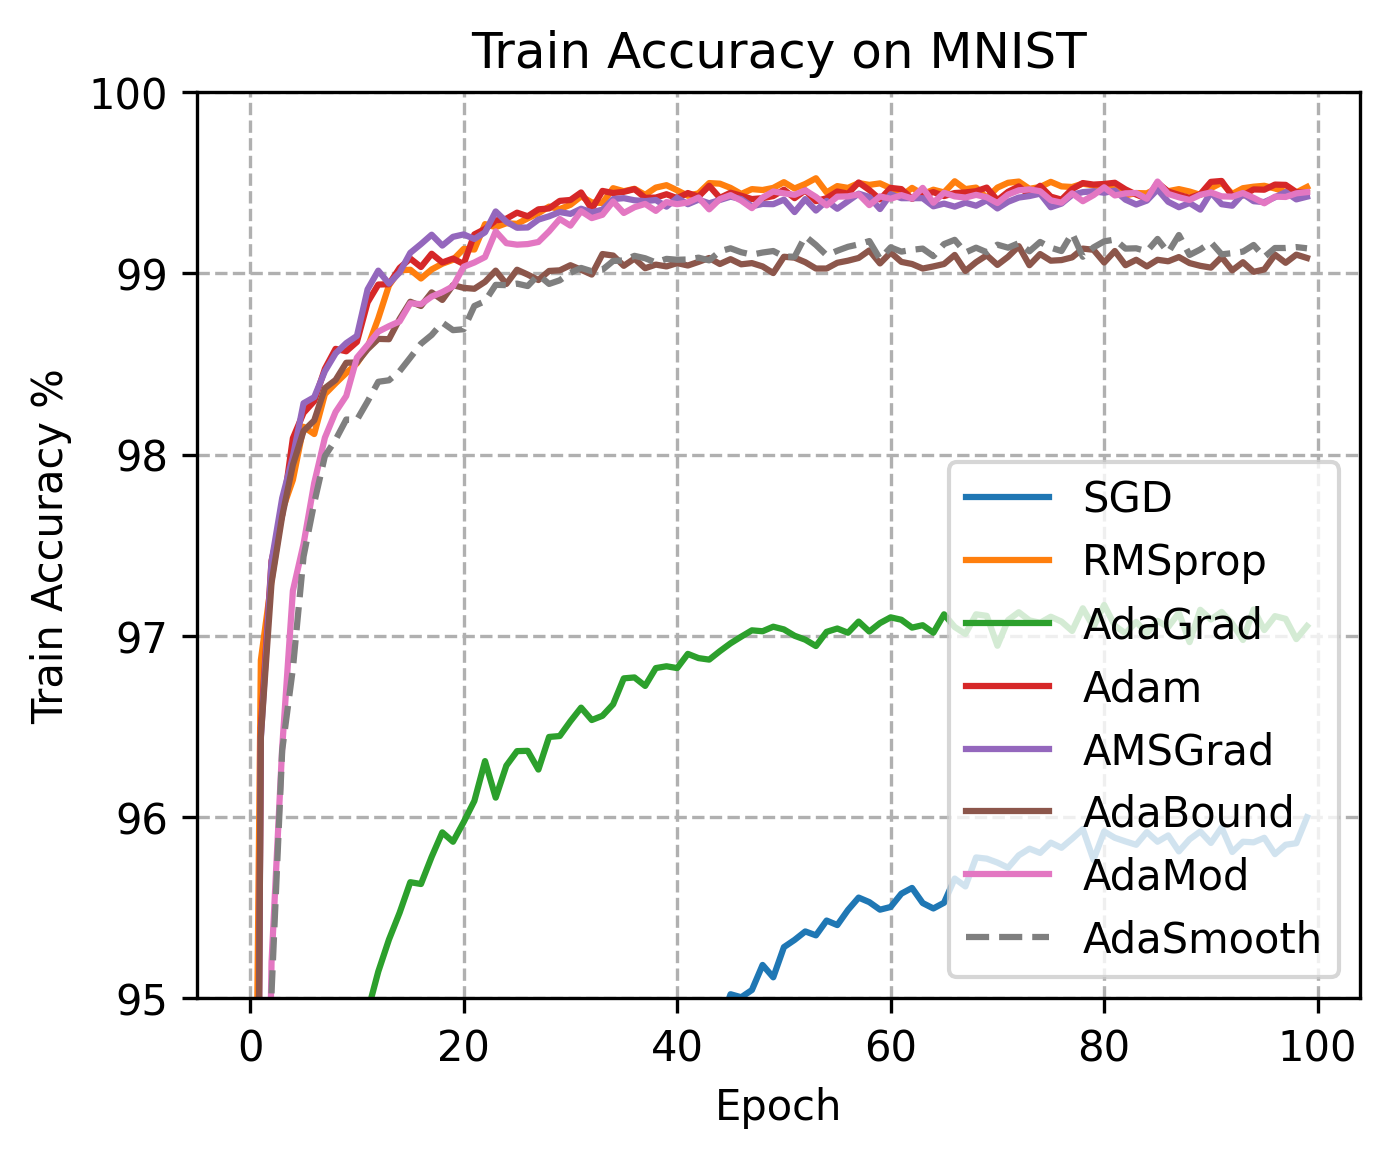

In [42]:
plot(file_name="./image/mnist_train_acc.svg",optimizers=LABELS, curve_type='train')

SGD 99.09999966621399
RMSprop 99.70999956130981
AdaGrad 99.23999905586243
Adam 99.66999888420105
AMSGrad 99.75000023841858
AdaBound 99.65999722480774
AdaMod 99.75000023841858
AdaSmooth 99.6999979019165


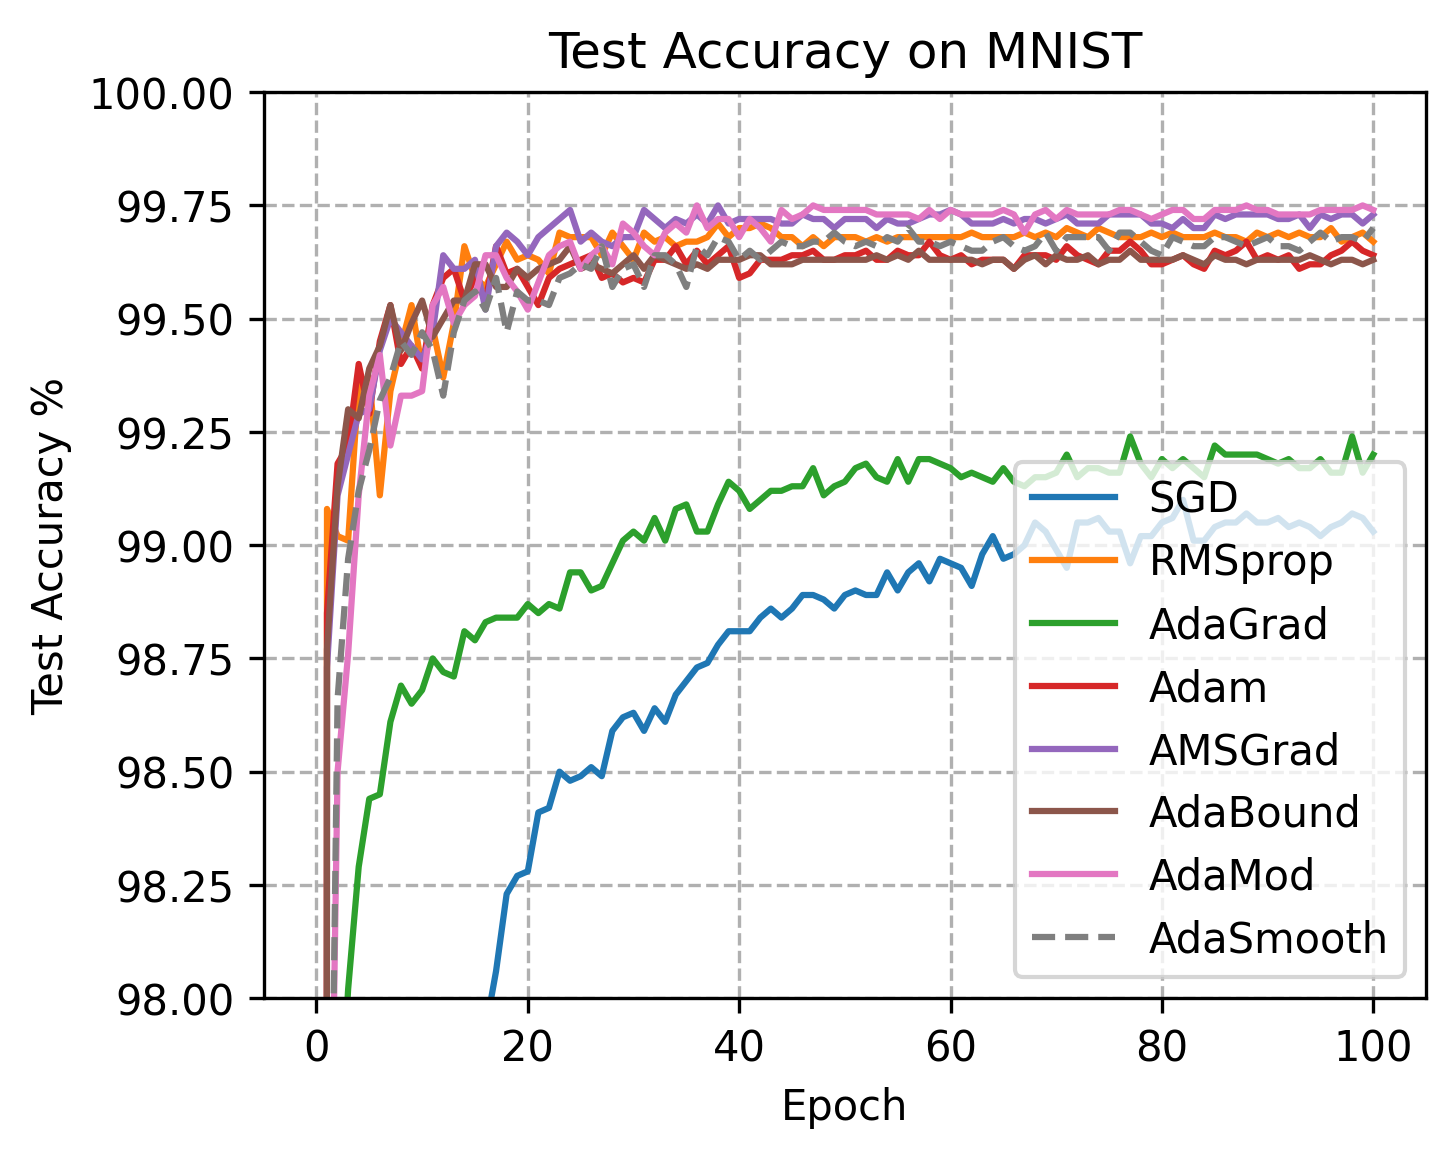

In [43]:
plot(file_name="./image/mnist_test_acc.svg",optimizers=LABELS, curve_type='test')

# 绘制损失函数

In [46]:
import numpy as np
LABELS = ['SGD', 'RMSprop','AdaGrad', 'Adam', 'AMSGrad', 'AdaBound','AdaMod', 'AdaSmooth']
#LABELS = ['SGD', 'Adam', 'AdaBound','AdaMod', 'AdaSmooth']

In [47]:
def get_folder_path():
    path = 'curve_loss'    
    return path

In [48]:
folder_path = get_folder_path()
filenames = [name for name in os.listdir(folder_path)]

In [49]:
filenames

['AdaBound_loss',
 'AdaGrad_loss',
 'AdaMod_loss',
 'Adam_loss',
 'AdaSmooth_loss',
 'AMSGrad_loss',
 'RMSprop_loss',
 'SGD_loss']

In [50]:
 paths = [os.path.join(folder_path, name) for name in filenames]

In [52]:
keys = [name.split('_')[0] for name in filenames]

In [55]:
def get_curve_data():
    folder_path = get_folder_path()
    filenames = [name for name in os.listdir(folder_path) ]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('_')[0] for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [58]:
def plot(file_name,optimizers=None, curve_type='train'):    
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)    
    assert all(_ in LABELS for _ in optimizers), 'Invalid optimizer'
    
    curve_data = get_curve_data()
    
    plt.figure(dpi=300,figsize=(5,4))
    #plt.figure()
    plt.title('{} Loss on MNIST'.format(curve_type.capitalize()))
    #plt.xlabel('Train Loss Counter')
    plt.xlabel('{} Loss Counter'.format(curve_type.capitalize())) if curve_type == 'train' else plt.xlabel('Epoch')
    plt.ylabel('{} Loss '.format(curve_type.capitalize()))
    #plt.ylim(80, 100 if curve_type == 'train' else 96)
    #plt.ylim(95, 100 if curve_type == 'train' else 96)
    #plt.ylim(95 if curve_type == 'train' else 98, 100)
    plt.ylim(0.0,2.5)    
    
    for optim in optimizers:
        linestyle = '--' if 'Smooth' in optim else '-'
        accuracies = np.array(curve_data[optim]['{}_loss'.format(curve_type)])
        print(optim,accuracies.size,accuracies.max(),accuracies.min())
        plt.plot(accuracies, label=optim, ls=linestyle)       
        
    plt.grid(ls='--')
    plt.legend()         
    plt.savefig(file_name,format="svg")
    # 应该在plt.savefig之后再调用plt.show()，否则保存的图片是空白
    plt.show()

SGD 2500 2.485908031463623 0.05746303126215935
RMSprop 2500 2.4492154121398926 0.0002167852653656155
AdaGrad 2500 2.485908031463623 0.02896798402070999
Adam 2500 2.485908031463623 0.0007764577167108655
AMSGrad 2500 2.485908031463623 0.0010813615517690778
AdaBound 2500 2.485908031463623 0.002634461736306548
AdaMod 2500 2.485908031463623 0.0006169952102936804
AdaSmooth 2500 2.485908031463623 0.0009047973435372114


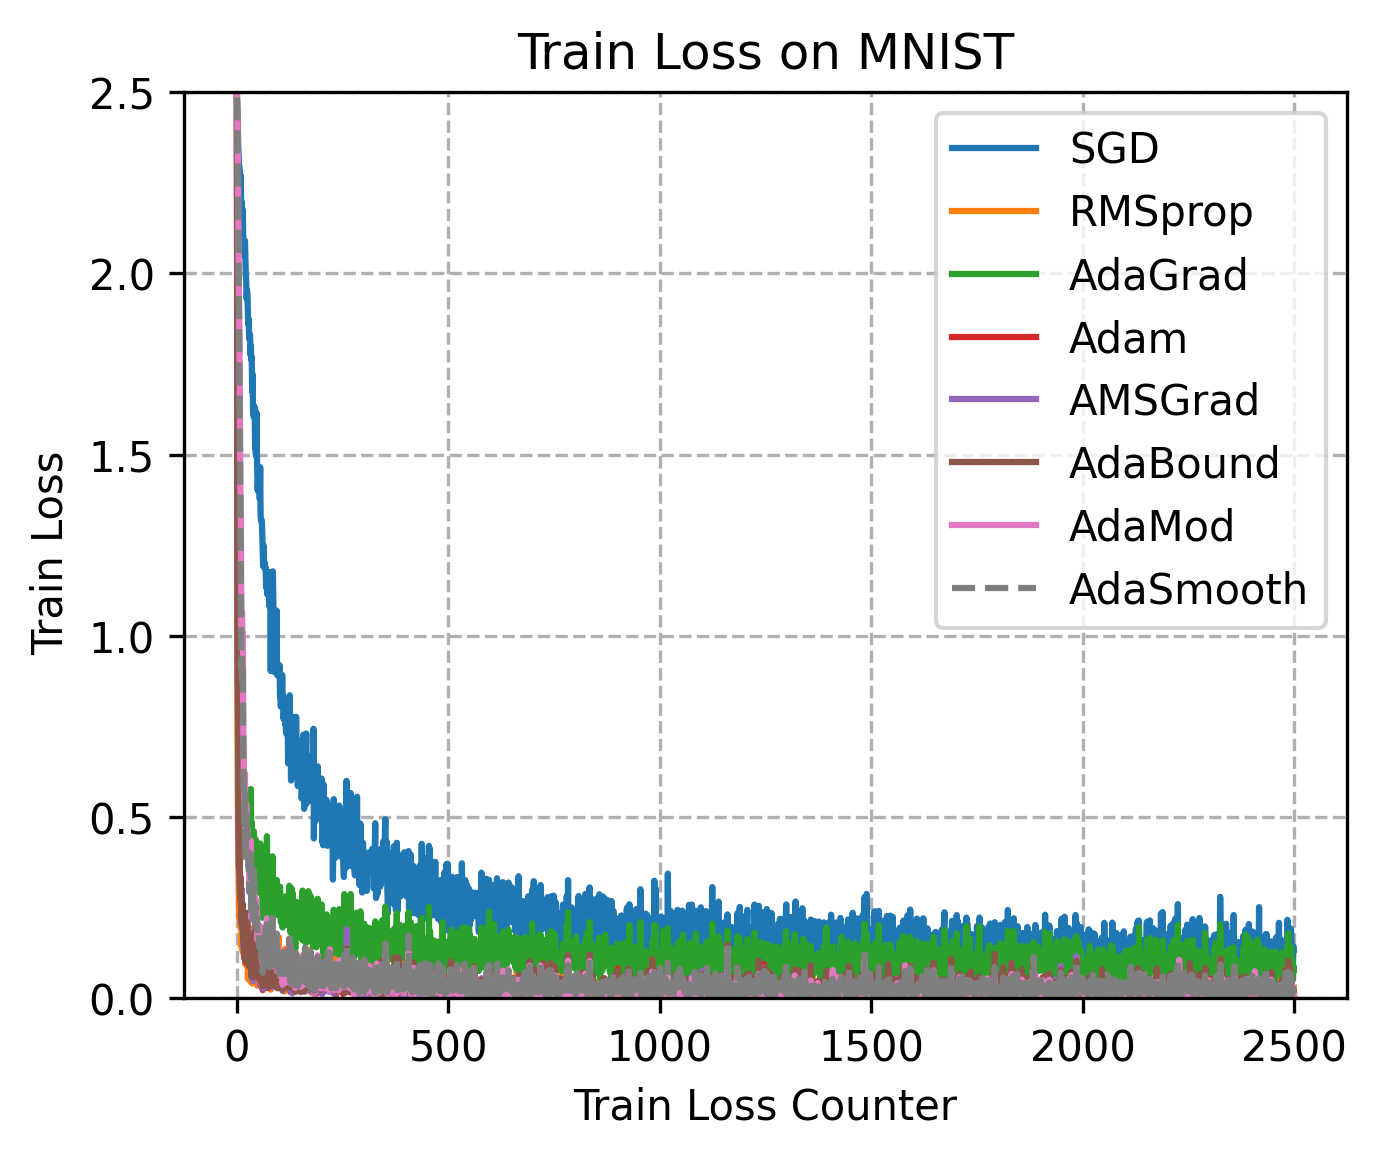

In [59]:
plot(file_name="./image/mnist_train_loss.svg",optimizers=LABELS, curve_type='train')

SGD 101 2.3037488037109375 0.032903450584411624
RMSprop 101 2.30128642578125 0.010909434008598328
AdaGrad 101 2.3037488037109375 0.02498041934967041
Adam 101 2.3037488037109375 0.011359527564048767
AMSGrad 101 2.3037488037109375 0.009874883818626404
AdaBound 101 2.3037488037109375 0.012164484405517578
AdaMod 101 2.3037488037109375 0.009450168275833129
AdaSmooth 101 2.3037488037109375 0.010300831365585328


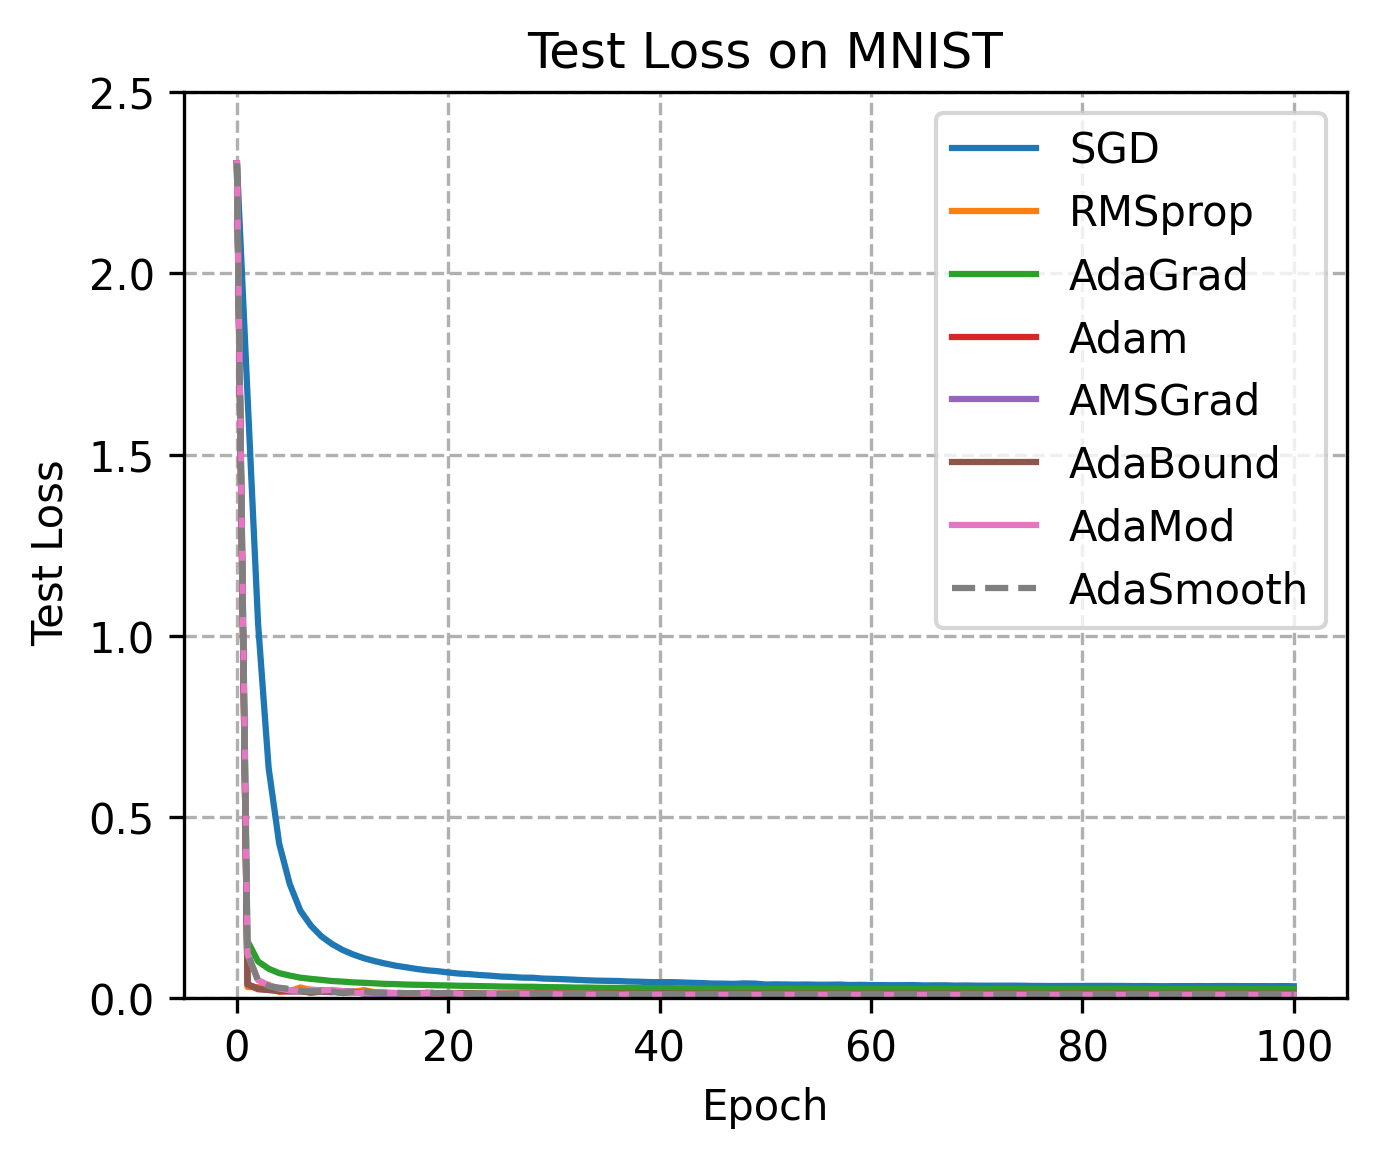

In [60]:
plot(file_name="./image/mnist_test_loss.svg",optimizers=LABELS, curve_type='test')